## **プログラミング基礎第12回**
統計量の計算2

---

### 今回の内容
* Python の f文字列
    * 文字列の中に値を埋め込む方法
* 分散と標準偏差
* 偏差
* 相関係数
    * 計算
* プログラムを細かく見直す

### 今回の設定
今回も前回と同じ設定をしておく

In [1]:
# Jupyterでmatplotlib を使うためのおまじない
%matplotlib inline
# Matplotlib の pyplot を取り込んで plt の名前で使う
import matplotlib.pyplot as plt
# NumPy を取り込んで np の名前で使う
import numpy as np

## f文字列

### 文字列と数値の扱い
文字列と print() 関数の基本機能:
* `str()` 関数は整数 (int) や実数 (float)を文字列(str)に変換する
* 文字列どうしは `+`演算子で連結可能
* `print()`関数ではカンマ区切りで数値と文字列の混在が可能

問題点と希望:
* `str()`の指定は長くなる
* `print()`はカンマ指定でスペース文字が入る
* 小数点以下の桁数を制御できない
* 右寄せや左寄せで複数行を揃えたい(表を綺麗に作りたい)

In [2]:
a = 10
x = 10 / 3
txt = 'a=' + str(a) + ', x=' + str(x)
print(txt)
print('a=', a, ', x=', x)

a=10, x=3.3333333333333335
a= 10 , x= 3.3333333333333335


### 文字列に式の値を埋め込む (Python 3.6)
* f文字列は書式機能を持った文字列
    * format(書式,形式、体裁)の意味
* `f'...'` の文字列の中に`{式}`の形で値・変数・式を埋め込める
* `{式:設定}`で細かな書式を指定できる
    * 左寄せ(`<`)、右寄せ (`>`)、中央寄せ(`^`) と表示幅
    * 実数値は小数点以下の桁数(`.数字f`) を指定できる

In [3]:
a = 10
f'a={a}, 2a={2*a}' # 変数や式を埋め込む

'a=10, 2a=20'

In [4]:
a=10
f'---a={a:5}, 2a={2*a:<8}---' #桁数指定,<が左寄せ

'---a=   10, 2a=20      ---'

In [5]:
x = 10/3
f'+++x={x:^10.3f}, 2x={x:.2f}' #数字fが小数点以下

'+++x=  3.333   , 2x=3.33'

### 例:表の出力
$\sqrt{n}$ と $2^n$ の表をテキスト出力で作成

In [6]:
import math

N = [ i for i in range(1,11)]
print(f'{"n":>4} | {"sqrt(n)":^12}| {"2^n":>6}')
print('---------------------------') # 桁数指定可能だが...

for n in N:
    print(f'{n:>4} | {math.sqrt(n):^12.8f}', end='')
    print(f'| {2**n:>6}')

   n |   sqrt(n)   |    2^n
---------------------------
   1 |  1.00000000 |      2
   2 |  1.41421356 |      4
   3 |  1.73205081 |      8
   4 |  2.00000000 |     16
   5 |  2.23606798 |     32
   6 |  2.44948974 |     64
   7 |  2.64575131 |    128
   8 |  2.82842712 |    256
   9 |  3.00000000 |    512
  10 |  3.16227766 |   1024


## ばらつき具合

### 範囲
統計で扱う範囲とは
* 最大値と最小値の差
* 平均の特徴を知るための一つの指標
* ばらつき具合によって範囲は変わる
* 範囲の広さで平均値、中央値、最頻値の見方も変わる

In [7]:
def find_range(n): # 範囲を計算
    h = max(n) #最大
    l = min(n) # 最小
    r = h - l  # 範囲
    return l,h,r # タプルで返す

np.random.seed(0)
mu = 50 #平均
sigma = 10 # ばらつき具合(標準偏差)
x = np.random.normal(mu, sigma, 10000) # 正規分布乱数

lo, hi, rg = find_range(x)

print(f'平均:{np.mean(x):.1f}, ', end="")
print(f'最小:{lo:.1f}, 最大:{hi:.1f}, 範囲:{rg:.1f}')

平均:49.8, 最小:12.6, 最大:88.0, 範囲:75.4


### 分散と標準偏差
ばらつき具合を測る尺度

**分散**
* 平均からどの程度だけ離れているか?
* 平均より大の場合と小の場合をまとめて扱う
* 計算が楽(美しいという人も)

**標準偏差**
* 分散の平方根
* 平均と単位同じで直接比較できる

**正規分布について**
* 正規分布は平均の周りに集まる分布
* 確率論や統計学で用いられる
* `np.random.normal()`は正規分布に従う乱数

### 分布の変化
平均が同じでも、標準偏差によって分布は変わる

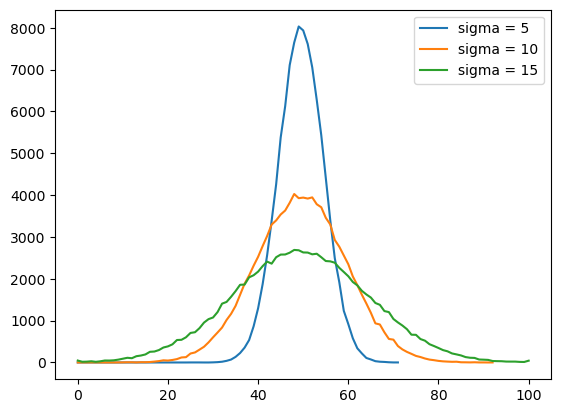

In [8]:
np.random.seed(0)
mu = 50 # 平均を固定

for sigma in [5, 10, 15]: # ばらつき具合を変更
    x = np.random.normal(mu, sigma, 100000)
    # 0未満を0, 100以上を100に丸める
    y = [0 if n < 0 else 100 if n >= 100 else int(n) for n in x]
    bins = np.bincount(y)
    plt.plot(bins, label=f'sigma = {sigma}')

plt.legend()
plt.show()

### 身長の例
クラスAとクラスBの生徒の身長を考える

In [9]:
def calc_mean(x):
    return sum(x)/len(x)

a = [165,168,171,177,171,162,163,166,168,187,172,177]
b = [188,161,174,155,184,187,160,158,178,175,160,167]

print(f'A の平均は {calc_mean(a):.1f} です')
print(f'B の平均は {calc_mean(b):.1f} です')

A の平均は 170.6 です
B の平均は 170.6 です


### 身長の分布
平均は同じでも分布の傾向が異なる


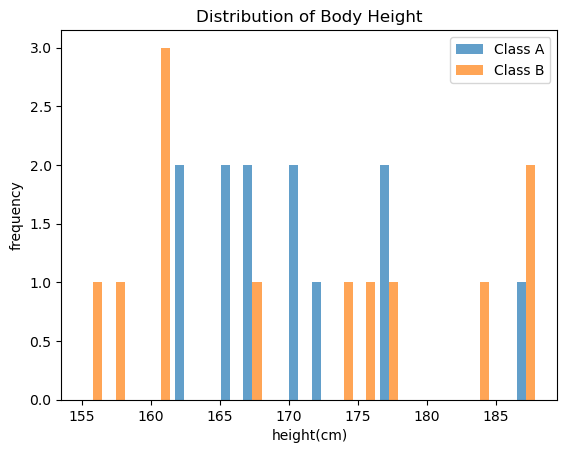

In [10]:
# ページ13のヒストグラムを生成するコード
# スライドの注記: plt.hist(..., alpha=0.7, bins=20) とした。alpha 指定は透明度
plt.hist([a, b], bins=20, alpha=0.7, label=['Class A', 'Class B'])
plt.title('Distribution of Body Height')
plt.xlabel('height(cm)')
plt.ylabel('frequency')
plt.legend()
plt.show()

- `plt.hist(...,alpha=0.7,bins=20)`とした。`alpha`指定は透明度

### 分散の計算式
* **偏差**: 個々のデータの平均との差 $(x_{i}-\overline{x})$
* **分散**: 偏差の二乗和の平均(二乗平均)
    * 正負の値を同じずれとして扱うため

>$$ \sigma^{2}=\frac{(x_{1}-\overline{x})^{2}+(x_{2}-\overline{x})^{2}+\cdot\cdot\cdot+(x_{n}-\overline{x})^{2}}{n}
>$$
>$$
=\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\overline{x})^{2} 
>$$
>- $\overline{x}:$算術平均
>
>- $(x_i-\overline{x}):$偏差

- 分散が大きいとは、平均から大きく離れていることを意味する。
- プログラムで計算するにはいくつかのステップを必要とする

### 偏差の並びを計算
平均値との差を作る $(x_{i}-\overline{x})$

In [11]:
def find_diff(x):
    m = calc_mean(x) #平均値
    diff = []
    for n in x:
        diff.append(n-m)
    return diff

def print_list(lst):
    for d in lst:
        print(f'{d:6.1f}', end='')
    print()

# 一部のデータで試す
a_sample = [165,168,171,177,171,162]

print(f'mean: {calc_mean(a_sample)}')
d = find_diff(a_sample)
print_list(d)

mean: 169.0
  -4.0  -1.0   2.0   8.0   2.0  -7.0


### リスト内包表記の活用
空リストへの追加はリスト内包表記でシンプルに書けます。

In [12]:
def find_diff_comprehension(x):
    m = calc_mean(x) #平均値
    return [ n-m for n in x ]

**注意**: 省略しすぎに注意。動作するが、ループの各ステップで平均値を再計算するため非効率

In [13]:
def find_diff_inefficient(x):
    # 悪い例: ループ内でcalc_meanが何度も呼ばれる
    return [ n-calc_mean(x) for n in x]

### 偏差の二乗の並び
偏差の二乗の並びを作る $(x_{i}-\overline{x})^{2}$

In [14]:
def squared_diff(x):
    m = calc_mean(x) #平均値
    return [ (n-m)**2 for n in x]

a_sample = [165,168,171,177,171,162]
print_list(squared_diff(a_sample))

  16.0   1.0   4.0  64.0   4.0  49.0


### 分散を計算する
偏差の二乗の並びの平均値を計算します。

In [15]:
def calc_var(x):
    # 分散: variance
    m = calc_mean(x) #平均値
    # 修正: 元資料の ( ... ] という構文エラーを修正
    return calc_mean([ (n-m)**2 for n in x ])

a_sample = [165,168,171,177,171,162]
print(a_sample)
print(f'平均:{calc_mean(a_sample):.1f}, 分散: {calc_var(a_sample):.1f}')

[165, 168, 171, 177, 171, 162]
平均:169.0, 分散: 23.0


### 標準偏差の式と計算
分散の平方根。元のデータと同じ単位で比較できる。
$$ \sigma = \sqrt{\sigma^2} $$

In [16]:
import math

def print_stats(name, x):
    m = calc_mean(x) #平均
    v = calc_var(x)  # 分散
    s = math.sqrt(v) # 標準偏差: standard deviation
    print(f'{name:^6}|{m:7.1f} |{v:7.1f} |{s:6.1f} |')

# このセルを実行する前に、前のセルで定義した a, b を再度定義します
a = [165,168,171,177,171,162,163,166,168,187,172,177]
b = [188,161,174,155,184,187,160,158,178,175,160,167]

print('class |  mean | variance|std.dev|')
print('-----------------------------------')
print_stats('A', a)
print_stats('B', b)

class |  mean | variance|std.dev|
-----------------------------------
  A   |  170.6 |   45.9 |   6.8 |
  B   |  170.6 |  130.7 |  11.4 |


## 互いの関係性

### 相関係数
* 二種類のデータの関係性を測りたい
    * よくある例: 気温とアイスクリームの売り上げ、国語と算数の成績
* **相関係数**
    * 二種類のデータを定量的に比較するために使われる指標の一つ
    * $-1 \sim +1$ の値で、相関の強さを表す
$$ r_{xy}=\frac{\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sigma_{x}\sigma_{y}} $$
* 分母の $\sigma_{x}$ と $\sigma_{y}$ はそれぞれの標準偏差
* 分子の $\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\overline{x})(y_{i}-\overline{y})$ を**共分散**と呼ぶ
    * 偏差の積の平均値

### グラフとの関係
* $r>0$ を正の相関、 $r<0$ を 負の相関、 $r \approx 0$ の場合を 無相関であるという
* 散布図を書いた際にデータの分布に方向性が見える


>**注意**: 強い相関があっても、それが因果関係を意味するとは限らない

### 例：国語と算数の関係
国語と算数の点数に関係があるか？

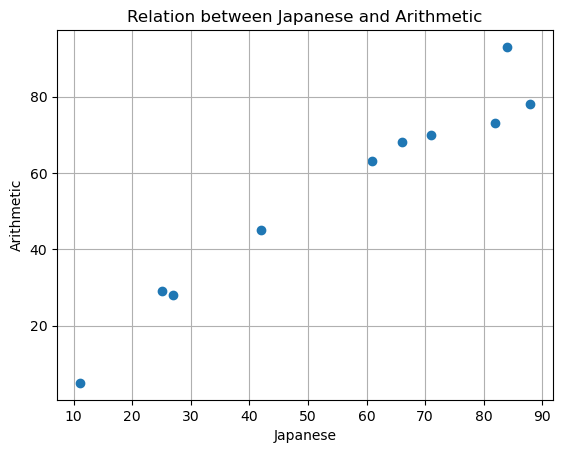

In [17]:
j = [11, 82, 25, 61, 66, 27, 42, 88, 71, 84] # 国語
a_math = [5, 73, 29, 63, 68, 28, 45, 78, 70, 93]  # 算数

plt.scatter(j, a_math)
plt.title('Relation between Japanese and Arithmetic')
plt.xlabel('Japanese')
plt.ylabel('Arithmetic')
plt.grid(True)
plt.show()

### 相関係数の計算
これまでのやり方と同じ

In [18]:
def calc_corr(x, y):
    if len(x) != len(y):
        print('length error')
        return 0
    
    xm = calc_mean(x)
    ym = calc_mean(y)
    
    # 共分散の計算 (yx = ...)
    yx = [ (x[i]-xm) * (y[i]-ym) for i in range(len(x)) ]
    
    xs = math.sqrt(calc_var(x))
    ys = math.sqrt(calc_var(y))
    
    # 分母が0になるケースを防ぐ
    if xs * ys == 0:
        return 0
        
    return calc_mean(yx) / (xs * ys)

In [19]:
j = [11, 82, 25, 61, 66, 27, 42, 88, 71, 84] # 国語
a_math = [5, 73, 29, 63, 68, 28, 45, 78, 70, 93]  # 算数

print(f'国語と算数の相関係数は{calc_corr(j, a_math):.2f}')

国語と算数の相関係数は0.98


- このデータには正の強い相関がある

## プログラミングに関する考察

### 名前の付け方
変数名と関数名の付け方に注意しよう
* 使用範囲の狭い名前は短く、広い名前は長く
    * 例: `xm`, `ym` と `calc_mean()`
* 他人が読むことを想定して名前をつける
  - 英単語が望ましい。長すぎる単語には省略語も良い (例: `calc_corr`)
* 学び方は作文と同じ。
  * 他者のものたくさん読んで、自分でたくさん書く
  * 1度書いたら少し間を空けて読み返す

### zip:二つのリストの組み合わせ
`zip()`: 同じ長さの二つのリストで、対応する要素を組み合わせる

In [20]:
a_char = ['a','b','c','d','e']
b_num = [3,2,1,4,5]
z = zip(a_char, b_num) # リストの対応する部分を組み合わせる

print(type(z))

for i, j in z:
    print(i, j)

<class 'zip'>
a 3
b 2
c 1
d 4
e 5


### `calc_corr()` 関数の改良
`zip` を使うと多少シンプルに見える

In [25]:
def calc_corr_zip(x, y):
    if len(x) != len(y):
        print('length error')
        return 0
    
    xm = calc_mean(x)
    ym = calc_mean(y)
    
    yx = [ (xi - xm) * (yi - ym) for xi, yi in zip(x, y) ]
    
    xs = math.sqrt(calc_var(x))
    ys = math.sqrt(calc_var(y))
    
    if xs * ys == 0:
        return 0
        
    return calc_mean(yx)/(xs*ys)

### 平均の重複計算
- 二つの関数で同じ平均値を計算している
  - `calc_corr()`でx,yに対して`calc_mean()`を計算し
  - `calc_var()`でそれぞれ同じ計算をしている
- `calc_var`の引数を変更すると計算の繰り返しを減らせる
  - `calc_corr()`で計算した平均値を`calc_var()`に渡す
  - デフォルト引数と`None`の組み合わせ

In [28]:
def calc_var(x, m=None):
    if m is None:
        m = calc_mean(x) # 指定がない場合のみ計算
    return calc_mean([ (n-m)**2 for n in x ])

def calc_corr(x, y):
    if len(x) != len(y):
        print('length error')
        return 0
        
    xm = calc_mean(x)
    ym = calc_mean(y)
    
    yx = [ (xi - xm)*(yi - ym) for xi, yi in zip(x, y) ]
    
    # 平均を指定
    xs = math.sqrt(calc_var(x, xm))
    ys = math.sqrt(calc_var(y, ym))
    
    if xs * ys == 0:
        return 0
        
    return calc_mean(yx)/(xs*ys)

### 時間のかかる計算の削減
平方根の計算は手間がかかるので、指数法則 $(a^n b^n = (ab)^n)$ を使えば2回の計算を1回に減らせる。
$$ \sigma_{x}\sigma_{y}=\sqrt{\sigma_{x}^{2}}\sqrt{\sigma_{y}^{2}}=\sqrt{\sigma_{x}^{2}\sigma_{y}^{2}} $$

In [27]:
def calc_corr(x, y):
    if len(x) != len(y):
        print('length error')
        return 0
        
    xm = calc_mean(x)
    ym = calc_mean(y)
    
    yx = [ (xi-xm)*(yi-ym) for xi, yi in zip(x,y) ]
    
    # 平均を指定して、分散を計算
    xv = calc_var(x, xm)
    yv = calc_var(y, ym)
    
    # 平方根の計算を1回にまとめる
    if xv*yv == 0:
        return 0
        
    return calc_mean(yx)/math.sqrt(xv*yv)

### numpy の利用
ここまでの処理は、NumPyを使えば遥かに簡単かつ高速に実行できる
`np.corrcoef(a,b)`は相関行列 ($2\times2$ のリスト)を返す。
結果が`c`の場合、`c[0][1]` または `c[1][0]` がaとbの相関係数。

In [24]:
import numpy as np

def print_stats_numpy(name, x):
    m = np.mean(x)       # 平均: mean
    v = np.var(x)        # 分散: variance
    s = np.std(x)        # 標準偏差: standard deviation (np.sqrt(v)と同じ)
    print(f'{name:^12} |{m:7.1f} |{v:7.1f} |{s:6.1f} |')

j = [11, 82, 25, 61, 66, 27, 42, 88, 71, 84] # 国語
a_math = [5, 73, 29, 63, 68, 28, 45, 78, 70, 93]  # 算数

print('  subjects   |  mean | variance|std.dev|')
print('-----------------------------------------')
print_stats_numpy('Japanese', j)
print_stats_numpy('Arithmetic', a_math)
print('-----------------------------------------')

c = np.corrcoef(j, a_math) # 相関係数行列
print(f'correlation coefficient: {c[0][1]:.2f}')

  subjects   |  mean | variance|std.dev|
-----------------------------------------
  Japanese   |   55.7 |  685.6 |  26.2 |
 Arithmetic  |   55.2 |  676.0 |  26.0 |
-----------------------------------------
correlation coefficient: 0.98


## まとめ
* **f文字列**
  * ""でくくって文字列に値や変数、式などを組み込める
* **範囲**
  * 最大値と最小値の差、範囲によって統計的な見方が変わる
* **分散と標準偏差**
  * 分散はばらつきを測る指標
  * 平均と同じ単位で比較できるようになったのが標準偏差
* **分散の計算プログラム**
  * 平均の差を二乗に並べそれぞれたしていく
* **相関係数**
  * 二種類のデータの相関関係を示す指標
* **相関係数の計算プログラム**
  * それぞれの標準偏差を利用して求める(関数として定義して求める)